In [1]:
import pandas as pd
db = pd.read_csv('../metadata.csv')

In [79]:
import ast
import traceback

In [8]:
from shapely.geometry import Polygon

In [34]:
db['bounds'] = db[['bounds']].applymap(lambda x: ast.literal_eval(x), na_action='ignore')
db['bounds'][0]

[-15730544, 10937407, -19027, -15691854, 10976097, 19663]

In [38]:
def get_polygon(bounds:list):
    if len(bounds) == 6:
        minx, miny, maxx, maxy = [bounds[0],bounds[1],bounds[3],bounds[4]]
        polygon = Polygon(((minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny), (minx, miny)))
    return polygon

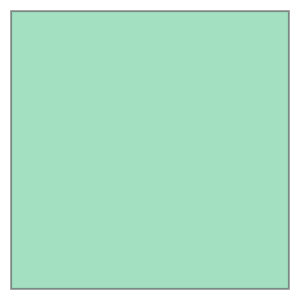

In [39]:
db['polygon'] = db[['bounds']].applymap(lambda x: get_polygon(x), na_action='ignore')
db['polygon'][0]

In [44]:
db['region'] = db[['region']].applymap(lambda x: x.replace('/',''), na_action='ignore' )

In [46]:
db.rename(columns={'location':'url'}, inplace=True)

In [71]:
db.to_csv('data.csv',index=False)

In [70]:
db.head(5)

,region,url,bounds,polygon
0,AK_Coastal_2009,https://s3-us-west-2.amazonaws.com/usgs-lidar-...,"[-15730544, 10937407, -19027, -15691854, 10976...","POLYGON ((-15730544 10937407, -15730544 109760..."
1,AK_Fairbanks-NSBorough_2010,https://s3-us-west-2.amazonaws.com/usgs-lidar-...,"[-16471700, 9519129, -45314, -16381190, 960963...","POLYGON ((-16471700 9519129, -16471700 9609639..."
2,AK_Juneau_2012,https://s3-us-west-2.amazonaws.com/usgs-lidar-...,"[-15014449, 8012267, -35030, -14943073, 808364...","POLYGON ((-15014449 8012267, -15014449 8083643..."
3,AK_Kenai_2008,https://s3-us-west-2.amazonaws.com/usgs-lidar-...,"[-16906356, 8303726, -166851, -16570284, 86397...","POLYGON ((-16906356 8303726, -16906356 8639798..."
4,AK_MatanuskaSusitna-Lot1_2011,https://s3-us-west-2.amazonaws.com/usgs-lidar-...,"[-16782341, 8663224, -51435, -16678201, 876736...","POLYGON ((-16782341 8663224, -16782341 8767364..."


In [49]:
MINX, MINY, MAXX, MAXY =[-10758075, 4793202, -10034133, 5517144]

In [50]:
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))


In [67]:
testpolygon = db['polygon'][4]

In [72]:
bd =[-93.756155, 41.918015, -93.747334, 41.921429]
MINX, MINY, MAXX, MAXY = bd
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

In [74]:
b = ([-10425171.940, -10423171.940], [5164494.710, 5166494.710])

In [76]:
b[0][0]
MINX, MINY, MAXX, MAXY = [b[0][0],b[1][0],b[0][1],b[1][1]]

In [68]:
reg=''
url=''
for i,r,u,p in db[['region','url','polygon']].head(5).itertuples():
    if p.contains(testpolygon):
        reg=r
        url=u
        break
print(reg)       

AK_MatanuskaSusitna-Lot1_2011


In [109]:
def validate_bound(b:tuple,data):
        MINX, MINY, MAXX, MAXY = [b[0][0],b[1][0],b[0][1],b[1][1]]
        polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
        db = pd.read_csv(data)
        db['bounds'] = db[['bounds']].applymap(lambda x: ast.literal_eval(x), na_action='ignore')
        db['polygon'] = db[['bounds']].applymap(lambda x: get_polygon(x), na_action='ignore')
        try:
            for i,r,u,p in db[['region','url','polygon']].itertuples():
                if p.contains(polygon):
                    return(True,r,u,bounds) 
            return(False,'bound specified not in any known region')
        except Exception:
            print("Error Occured for")
            traceback.print_exc()


In [110]:
validate_bound(b,'data.csv')

(True,
 'IA_FullState',
 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json',
 [-10758075, 4793202, -361911, -10034133, 5517144, 362031])

In [ ]:
def create_pipeline(self,pipeline_path:str ,bounds:str,region:str,location:str) -> None :
        try:
            pipeline_json = json.load(open(pipeline_path))
            pipeline_json['pipeline'][0]['bounds'] = bounds
            pipeline_json['pipeline'][0]['filename'] = location
            self.pipeline_json = pipeline_json
            self.tiff_path = pipeline_json['pipeline'][5]['filename']
            self.shp_filename = os.path.splitext(os.path.split(self.tiff_path)[1])[0]
        except Exception:
            print("Error Occured")
            traceback.print_exc()
            